In [1]:
# data manipulation and EDA libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# data preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from imblearn.over_sampling import SMOTE

# data modelling libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# data metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,roc_curve
from sklearn.metrics import classification_report,confusion_matrix

# Model interpretation and deployment libraries
import shap
import pickle
from sklearn.pipeline import Pipeline
import streamlit as st
print("All libraries are imported")

All libraries are imported


https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

In [2]:
df=pd.read_csv('heart_2020_cleaned.csv')

In [3]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


**Attributes of the data**
1. HeartDisease- It is a binary variable, indicating whether the individual has heart disease ("Yes" or "No").
2. BMI- BMI represents Body Mass Index, a measure of obesity or overweight.
3. "Smoking" and "AlcoholDrinking" represent smoking and alcohol consumption habits.
4. "PhysicalHealth" and "MentalHealth" appear to be health-related ratings or scores.
5. "AgeCategory" categorizes individuals into age groups.
6. "Diabetic," "Asthma," "KidneyDisease," and "SkinCancer" indicate the presence or absence of these health conditions.
7. "Stroke" is also a binary variable, indicating whether the individual has had a stroke ("Yes" or "No").

# Step2 : Data Sanity check
- Get the basic info of the data.
- Look for null values
- Look for corrupted data
- Get the data summary statistics (both numerical and categorical)
- Look for erroneous values in the data

In [4]:
#Get the shape of the data
data_shape=df.shape
print("Rows= ",data_shape[0],"\nColumns =",data_shape[1])

Rows=  319795 
Columns = 18


In [5]:
#Get the basic info
info=df.info()

#get the data type
dtype=df.dtypes
info,dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

(None,
 HeartDisease         object
 BMI                 float64
 Smoking              object
 AlcoholDrinking      object
 Stroke               object
 PhysicalHealth      float64
 MentalHealth        float64
 DiffWalking          object
 Sex                  object
 AgeCategory          object
 Race                 object
 Diabetic             object
 PhysicalActivity     object
 GenHealth            object
 SleepTime           float64
 Asthma               object
 KidneyDisease        object
 SkinCancer           object
 dtype: object)

In [6]:
#Check for unique levels in categorical
df.Stroke.unique()

array(['No', 'Yes'], dtype=object)

In [7]:
#Check for nulls and duplicates
nulls=df.isnull().sum()
dups=df.duplicated().sum()
nulls,dups

(HeartDisease        0
 BMI                 0
 Smoking             0
 AlcoholDrinking     0
 Stroke              0
 PhysicalHealth      0
 MentalHealth        0
 DiffWalking         0
 Sex                 0
 AgeCategory         0
 Race                0
 Diabetic            0
 PhysicalActivity    0
 GenHealth           0
 SleepTime           0
 Asthma              0
 KidneyDisease       0
 SkinCancer          0
 dtype: int64,
 18078)

In [8]:
#Look for corrupt characters in the data
df[~df.applymap(np.real).any(1)]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer


In [9]:
#Summary statistics of numerical and categorical data
num_stats=df.describe().T
cat_stats=df.describe(include='O').T
print(num_stats)
print(cat_stats)

                   count       mean       std    min    25%    50%    75%  \
BMI             319795.0  28.325399  6.356100  12.02  24.03  27.34  31.42   
PhysicalHealth  319795.0   3.371710  7.950850   0.00   0.00   0.00   2.00   
MentalHealth    319795.0   3.898366  7.955235   0.00   0.00   0.00   3.00   
SleepTime       319795.0   7.097075  1.436007   1.00   6.00   7.00   8.00   

                  max  
BMI             94.85  
PhysicalHealth  30.00  
MentalHealth    30.00  
SleepTime       24.00  
                   count unique        top    freq
HeartDisease      319795      2         No  292422
Smoking           319795      2         No  187887
AlcoholDrinking   319795      2         No  298018
Stroke            319795      2         No  307726
DiffWalking       319795      2         No  275385
Sex               319795      2     Female  167805
AgeCategory       319795     13      65-69   34151
Race              319795      6      White  245212
Diabetic          319795      4    

In [10]:
cat_col=df.select_dtypes(exclude=np.number).shape[1]
num_col=df.select_dtypes(include=np.number).shape[1]
print('No. of categorical columns are: ',cat_col)
print("No. of nuymerical columns are: ",num_col)

No. of categorical columns are:  14
No. of nuymerical columns are:  4


**Data Summary**
1. The dataset has 319795 and 18 columns.
2. The dataset has 14 categorical and 4 numerical columns.
3.** The categorical variable Stroke has 2 levels Yes/No**.
4. There are no missing values or duplicates.
5. There are no corrupt characters.


## Step 3: Data Cleaning Step
-  AgeCategory shouldn't be categorical, so I will apply a function to calculate the mean age and make it a continuous feature

In [11]:
encode_AgeCategory = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}
df['AgeCategory'] = df['AgeCategory'].apply(lambda x: encode_AgeCategory[x])
df['AgeCategory'] = df['AgeCategory'].astype('float')

In [12]:
cat_col=df.select_dtypes(exclude=np.number)
num_col=df.select_dtypes(include=np.number)
print(cat_col.columns)
print(num_col.columns)

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma',
       'KidneyDisease', 'SkinCancer'],
      dtype='object')
Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 'SleepTime'], dtype='object')


In [13]:
#Target Variable
df['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [14]:
for col in cat_col:
    print("Value counts for column:", col)
    print(df[col].value_counts())
    print("\n")

Value counts for column: HeartDisease
No     292422
Yes     27373
Name: HeartDisease, dtype: int64


Value counts for column: Smoking
No     187887
Yes    131908
Name: Smoking, dtype: int64


Value counts for column: AlcoholDrinking
No     298018
Yes     21777
Name: AlcoholDrinking, dtype: int64


Value counts for column: Stroke
No     307726
Yes     12069
Name: Stroke, dtype: int64


Value counts for column: DiffWalking
No     275385
Yes     44410
Name: DiffWalking, dtype: int64


Value counts for column: Sex
Female    167805
Male      151990
Name: Sex, dtype: int64


Value counts for column: Race
White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64


Value counts for column: Diabetic
No                         269653
Yes                         40802
No, borderline diab

In [15]:
#Creating a copy
data=df.copy()
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,57.0,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80.0,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,67.0,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,77.0,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,42.0,White,No,Yes,Very good,8.0,No,No,No


In [16]:
#Categorical encoding of Target Columns
d={"No":0,"Yes":1}
data['HeartDisease']=data['HeartDisease'].map(d)


In [17]:
data['HeartDisease'].value_counts()

0    292422
1     27373
Name: HeartDisease, dtype: int64

### Step4: Exploratory Data Analysis 
- univariate analysis
   - numerical data - histograms and boxplots
   - categorical data - bar plots
- Bivariate analysis
   - bivariate bar charts
   - scatter plots
- Correlation analyis
   - Correlation matrix and heatmaps

# Univariate Analysis

### For numerical columns

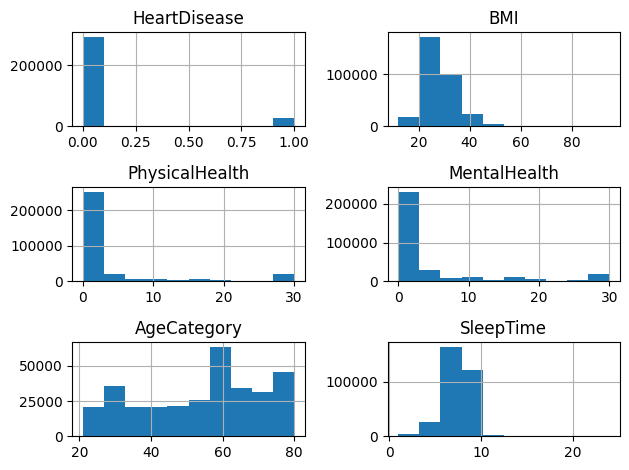

In [18]:
data.hist()
plt.tight_layout()
plt.show()

In [19]:
# Create individual box plots and histplots
def histplot_boxplot(data, feature, figsize=(12, 7), bins=None):
    print('Univariate for ...', feature)
    fig, (ax_box, ax_hist) = plt.subplots(nrows=2, sharex=True, figsize=figsize)
    
    sns.boxplot(data=data, x=feature, color='violet', ax=ax_box, showmeans=True)
    sns.histplot(data=data, x=feature, ax=ax_hist, bins=bins) if bins else sns.histplot(data=data, x=feature, ax=ax_hist)
    plt.axvline(data[feature].mean(), color='green', linestyle='--')  # Use mean instead of data[feature]
    plt.axvline(data[feature].median(), color='black', linestyle='-')
    plt.show()

Univariate for ... HeartDisease


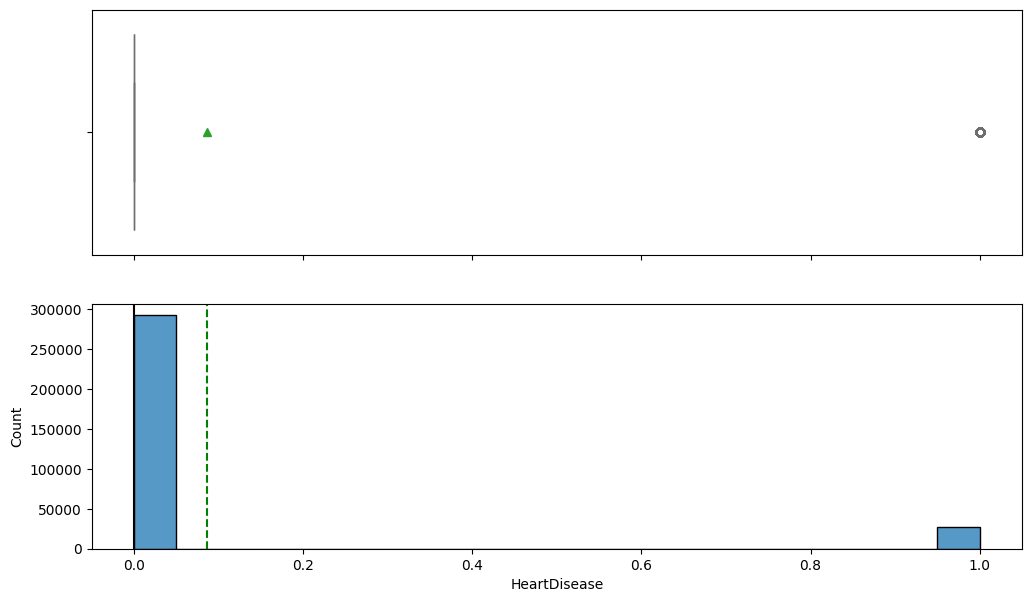

Univariate for ... BMI


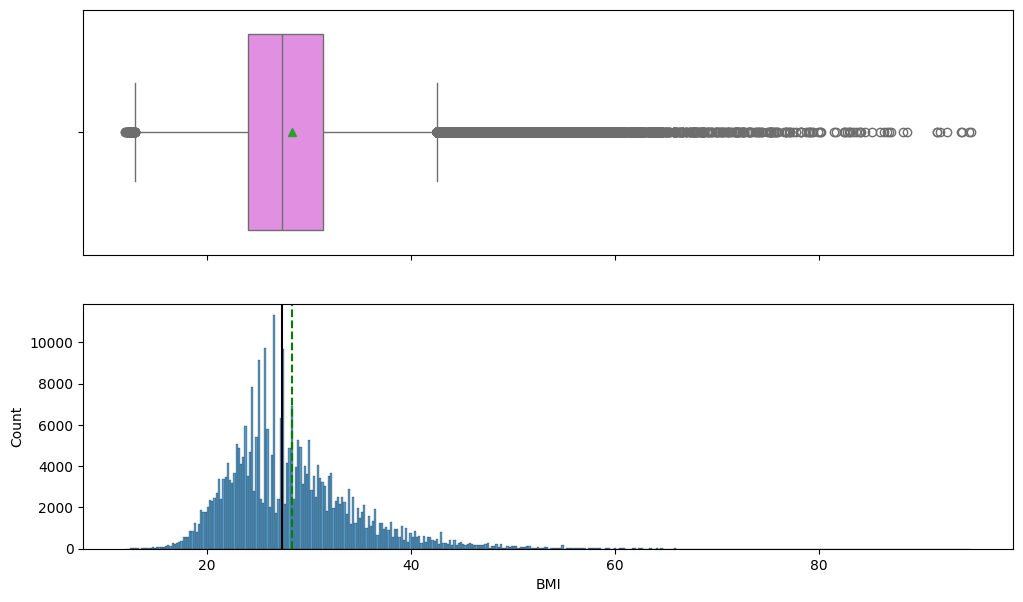

Univariate for ... PhysicalHealth


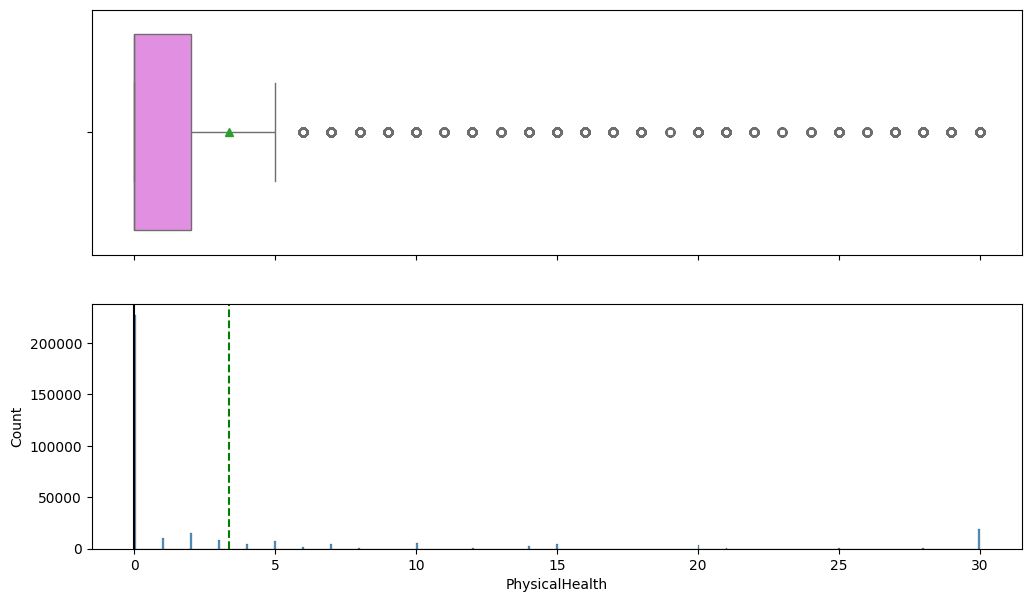

Univariate for ... MentalHealth


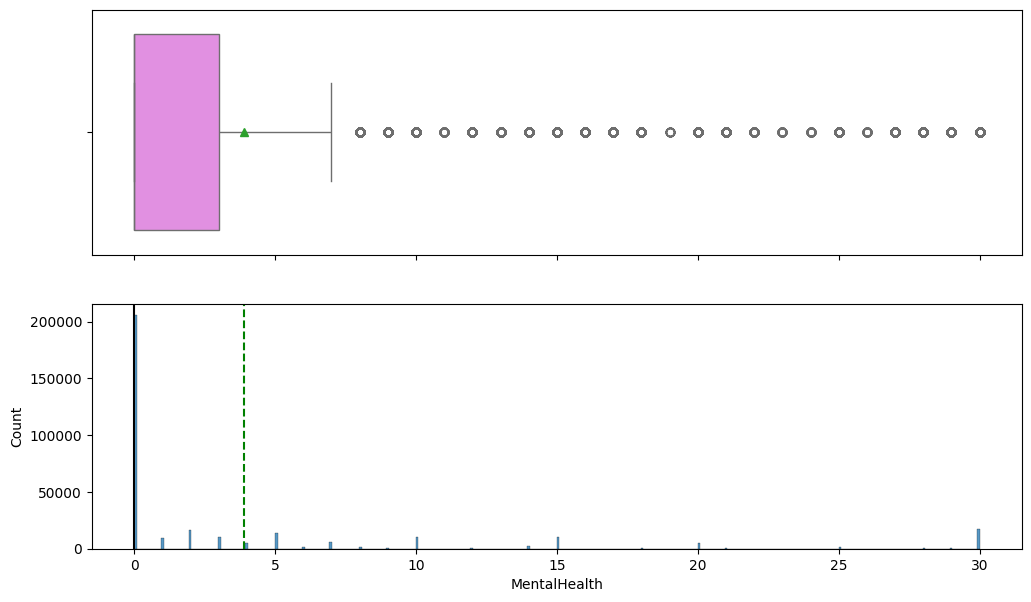

Univariate for ... AgeCategory


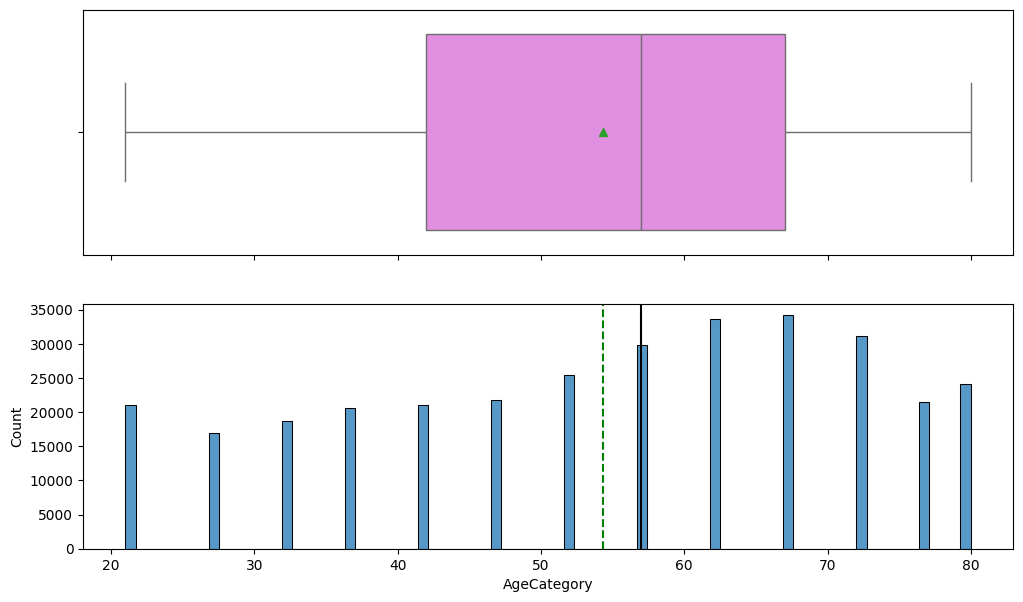

Univariate for ... SleepTime


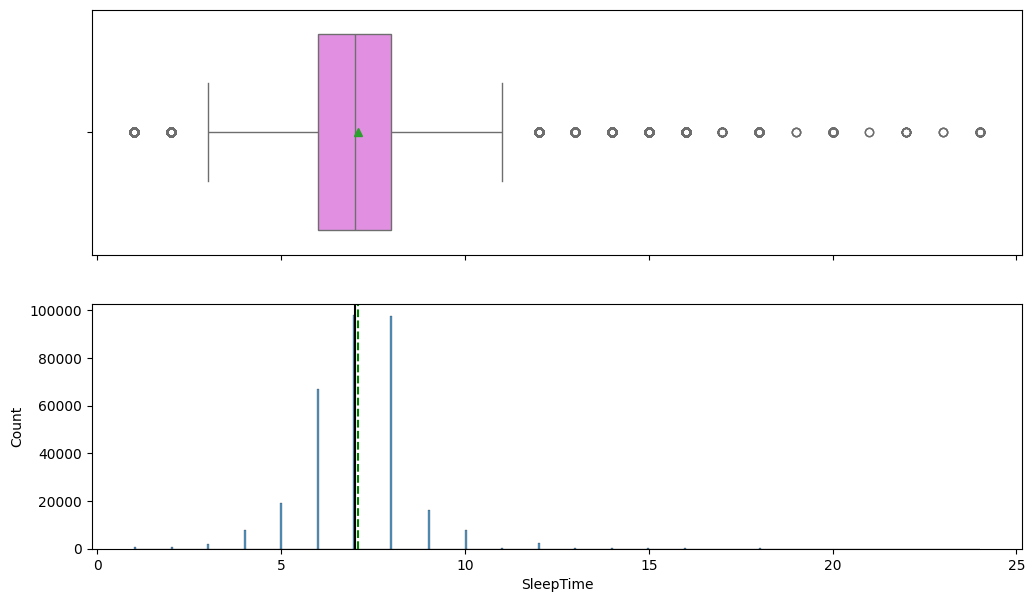

In [20]:
# Assuming df is your DataFrame, iterate through numeric columns
for col in data.select_dtypes(exclude='O').columns:
    histplot_boxplot(data=data, feature=col)

**Observations**
1. There is presence of Outlier in case of BMI.
2. There are presence of outlier in case of Physical and mental health.
3. In case of sleep time,there is +ve as well as negative outlier.

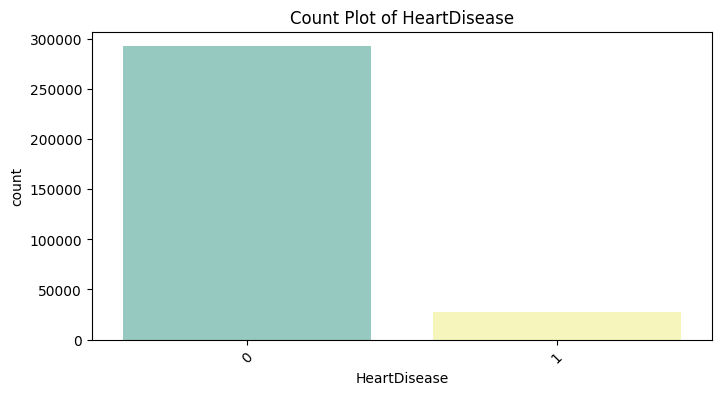

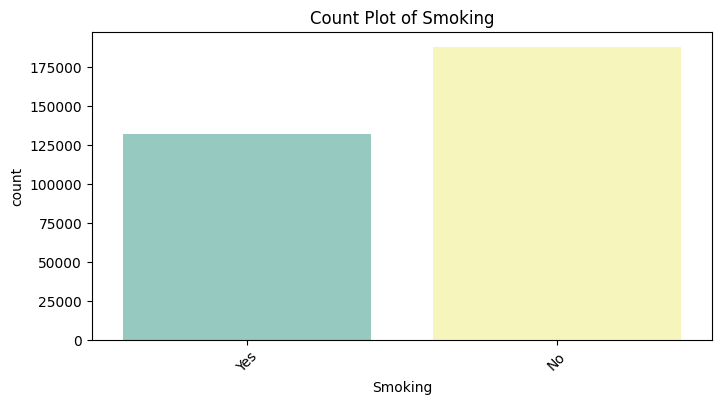

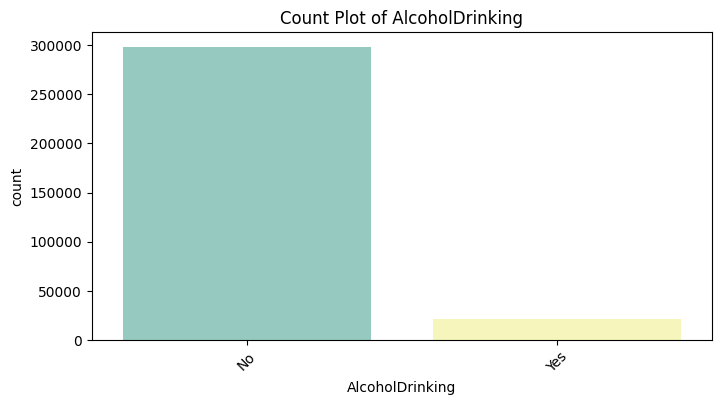

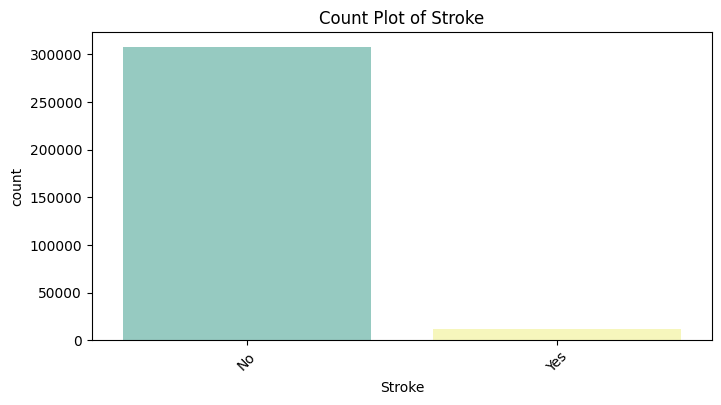

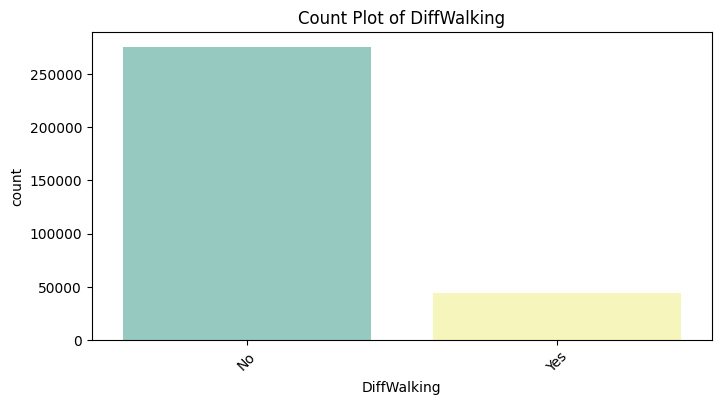

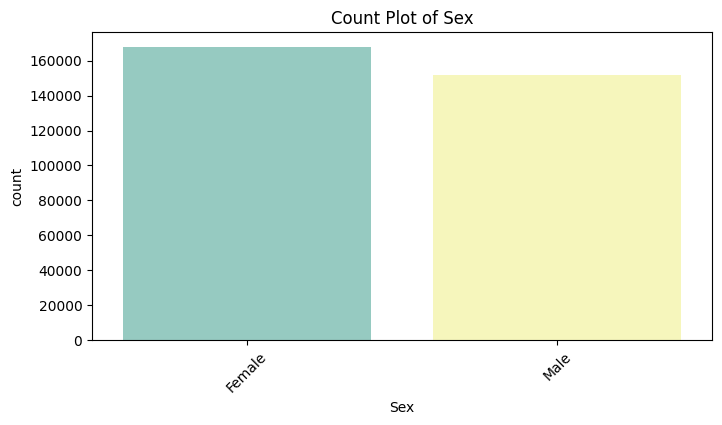

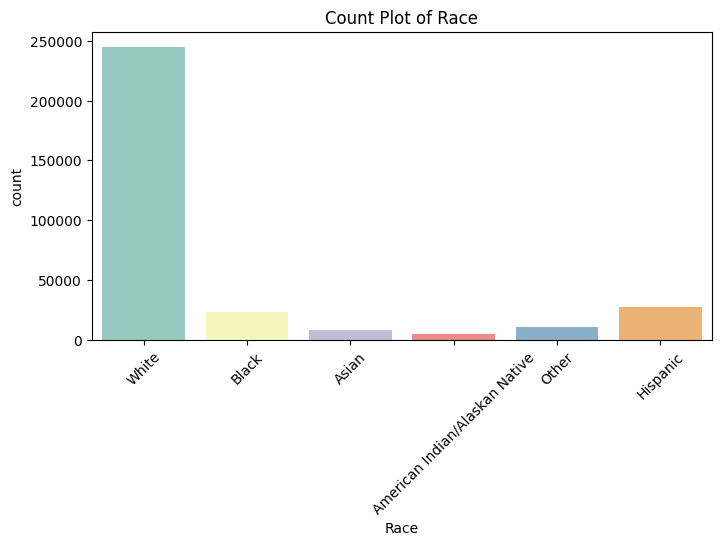

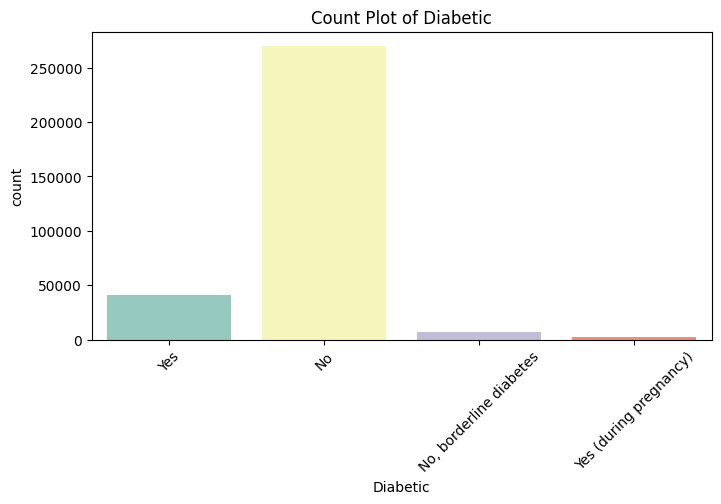

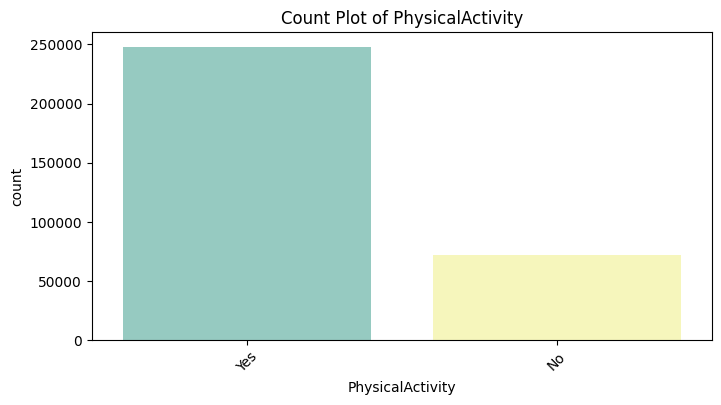

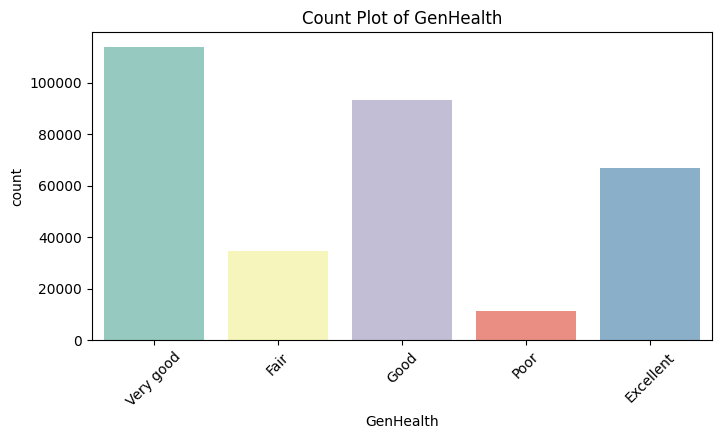

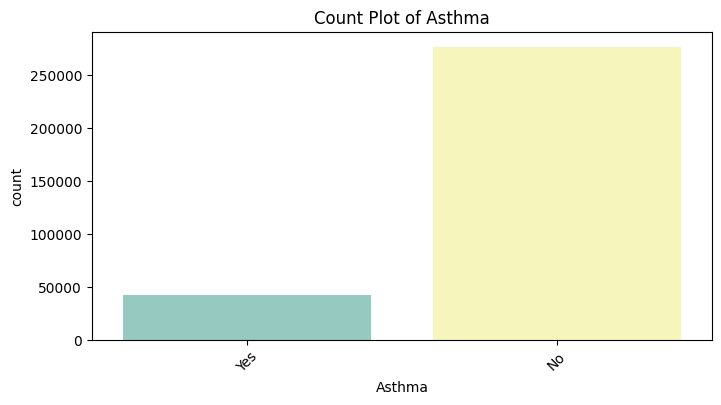

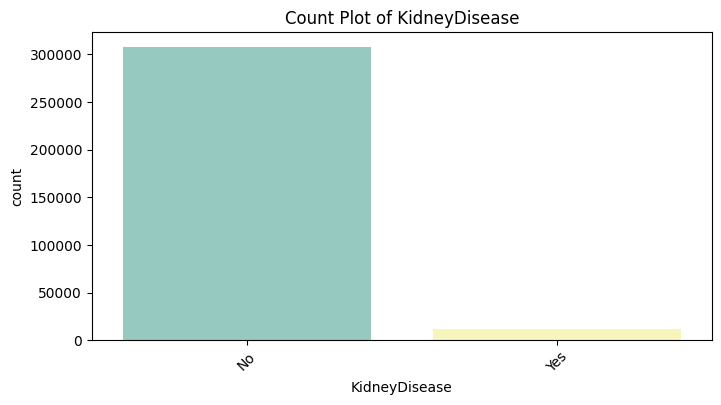

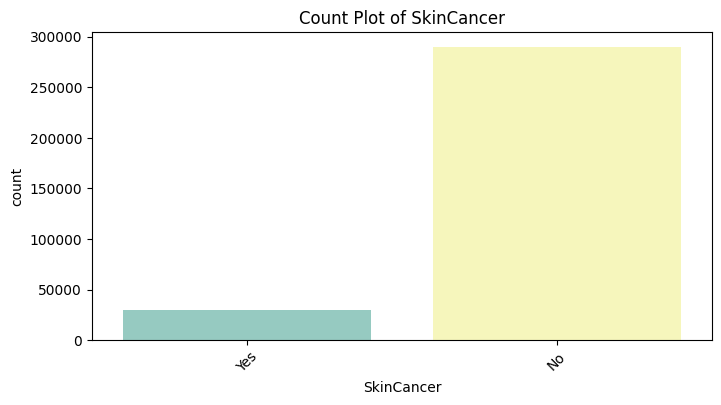

In [21]:
for column in cat_col:
    plt.figure(figsize=(8, 4))  # Set the figure size
    sns.countplot(data=data, x=column, palette='Set3')  # Create the count plot
    plt.title(f'Count Plot of {column}')  # Set the title
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.show()  # Show the plot

**Observations**
1. There are 280000 people with no heart disease.
2. There are over 175000 not smoker.
3. There are nearly 290000 non drinker.
4. Over 300000 people have not suffered any stroke.
5. There are barely 50000 people who have difficulty in walking.
6. There are little over 160000 women and around 150000 men.
7. Over 250000 people are non diabetic
8. More than 200000 people are physically active.
9. less than 5000 people are asthmatic.
10. There are more than 300000 people with no kidney disease.

# Bivariate Analysis

### Between Categorical vs Numerical Columns

Bivariates between HeartDisease and BMI


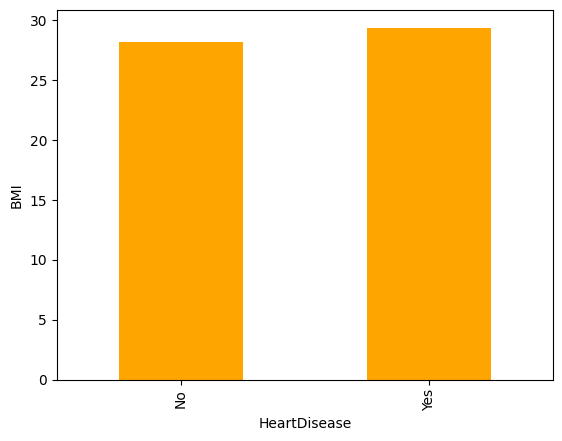

Bivariates between HeartDisease and PhysicalHealth


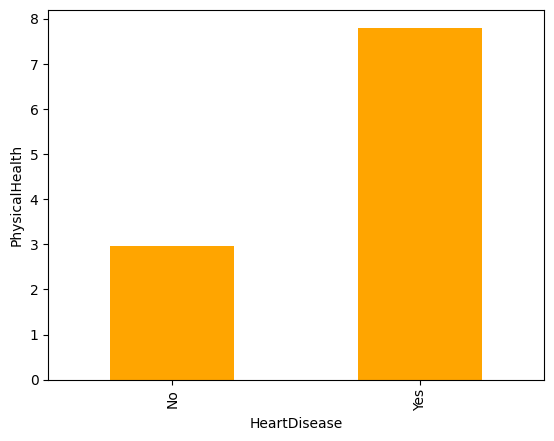

Bivariates between HeartDisease and MentalHealth


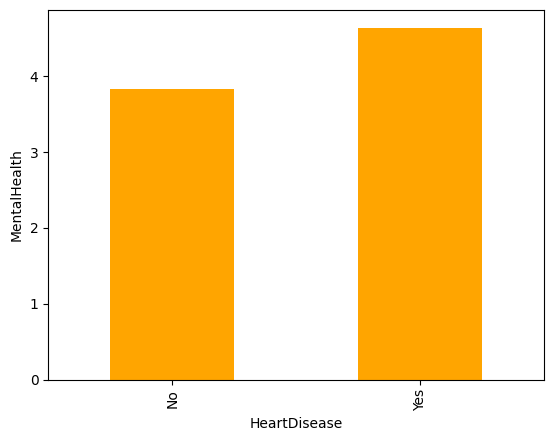

Bivariates between HeartDisease and AgeCategory


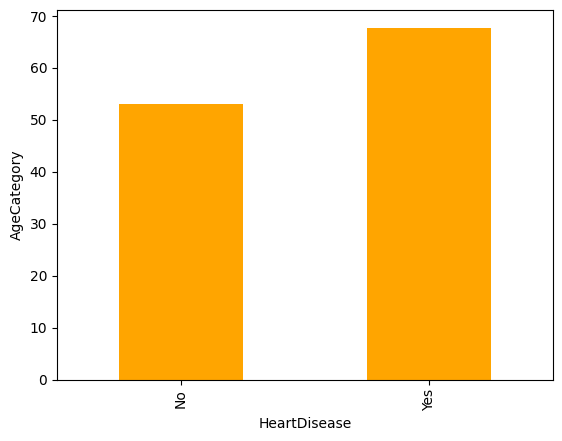

Bivariates between HeartDisease and SleepTime


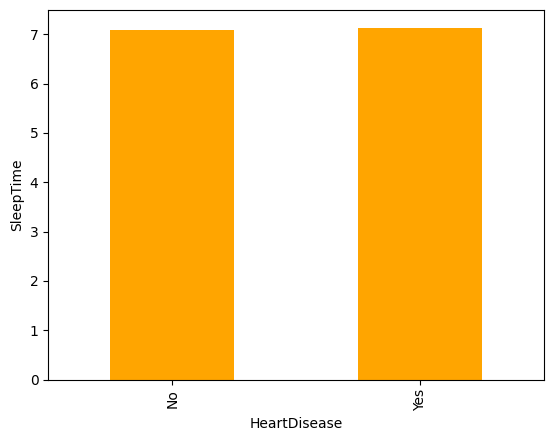

In [22]:

for col in num_col:
    print("Bivariates between HeartDisease and {}".format(col))
    df.groupby("HeartDisease")[col].mean().plot(kind="bar",color="orange")
    plt.ylabel(col)
    plt.show()

### Between Categorical vs Categorical Columns

In [23]:
cat_col.columns

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma',
       'KidneyDisease', 'SkinCancer'],
      dtype='object')

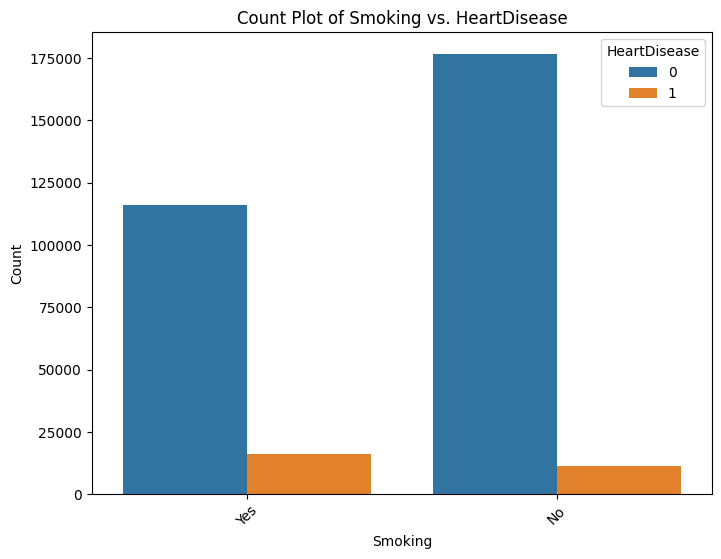

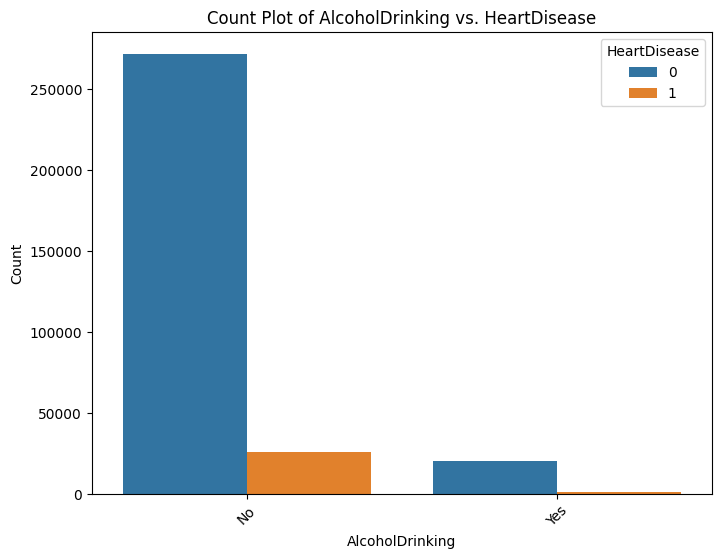

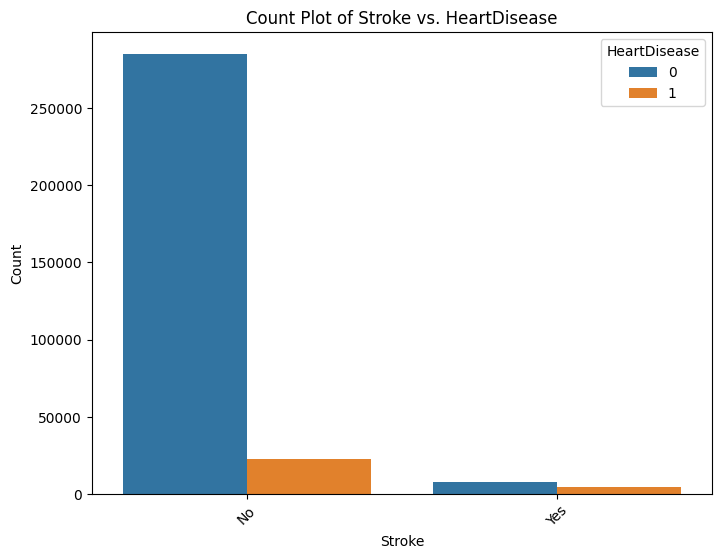

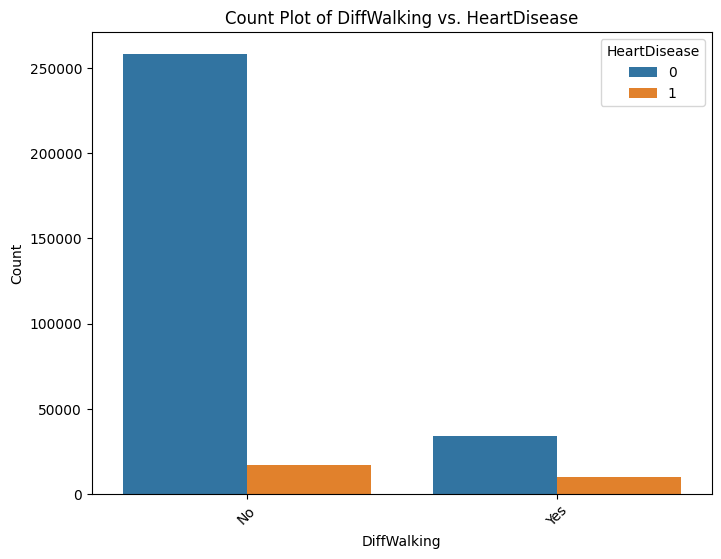

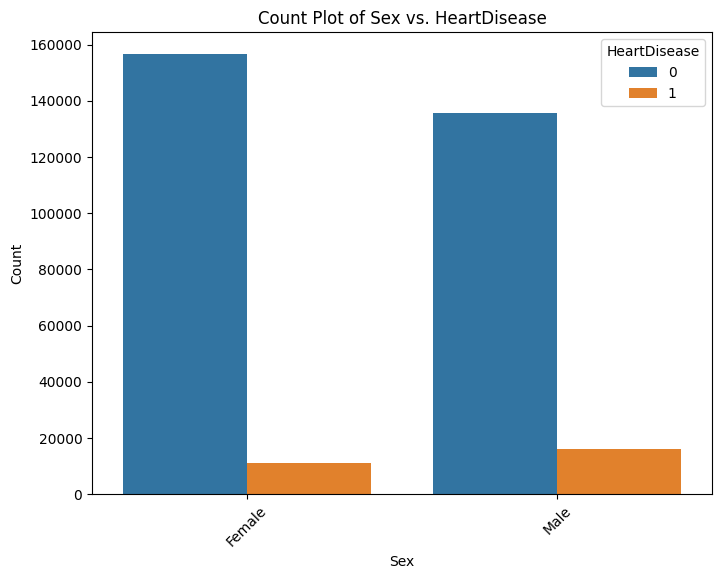

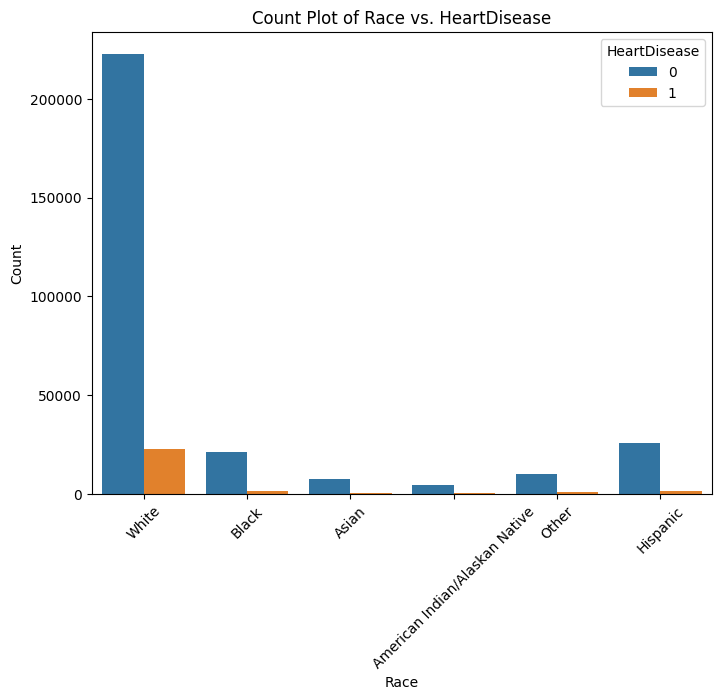

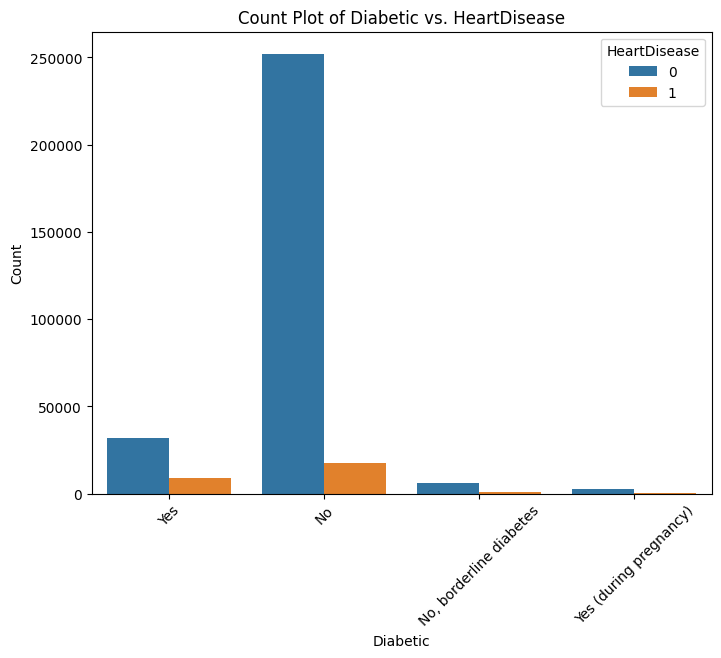

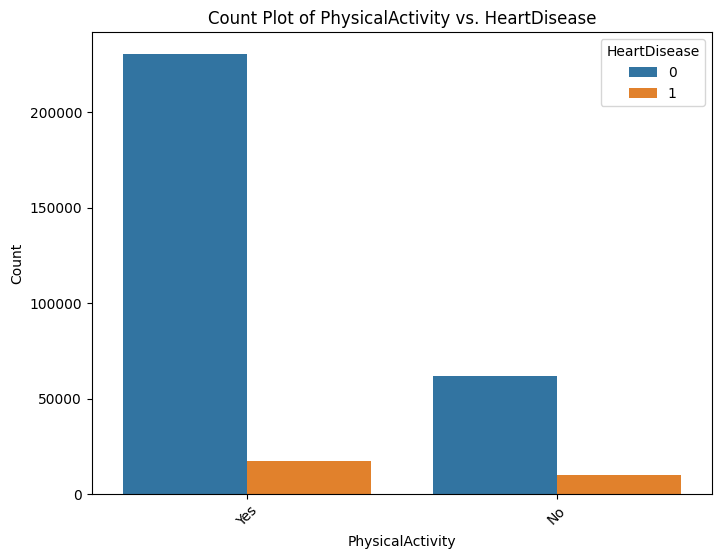

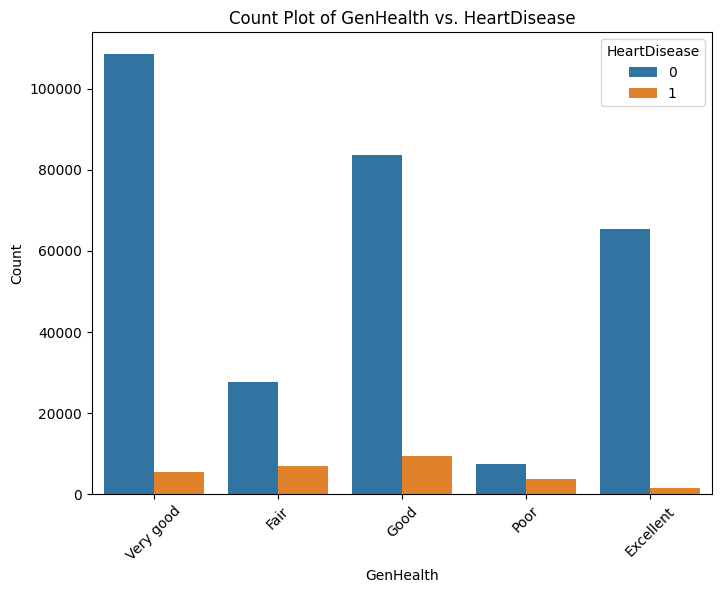

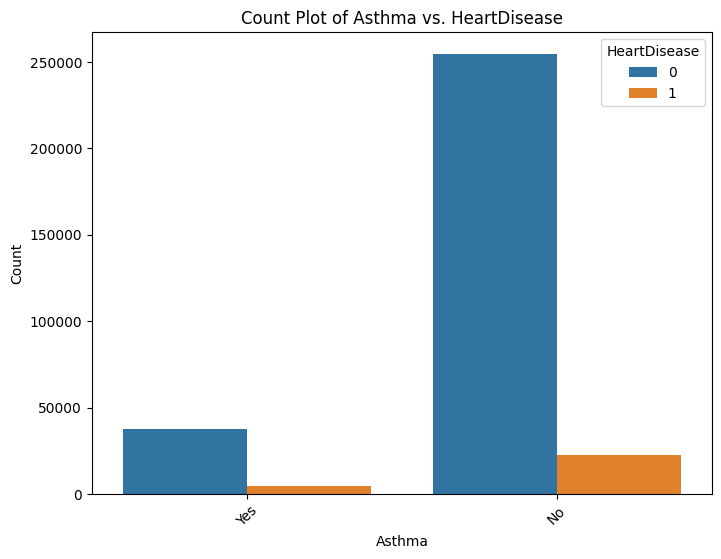

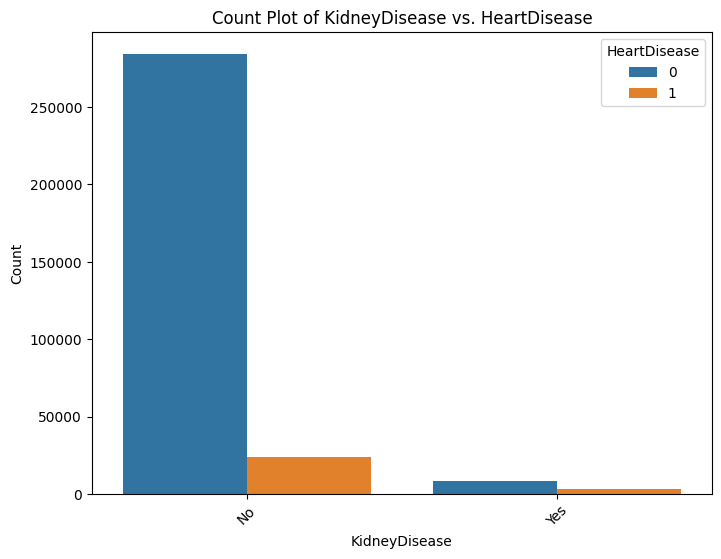

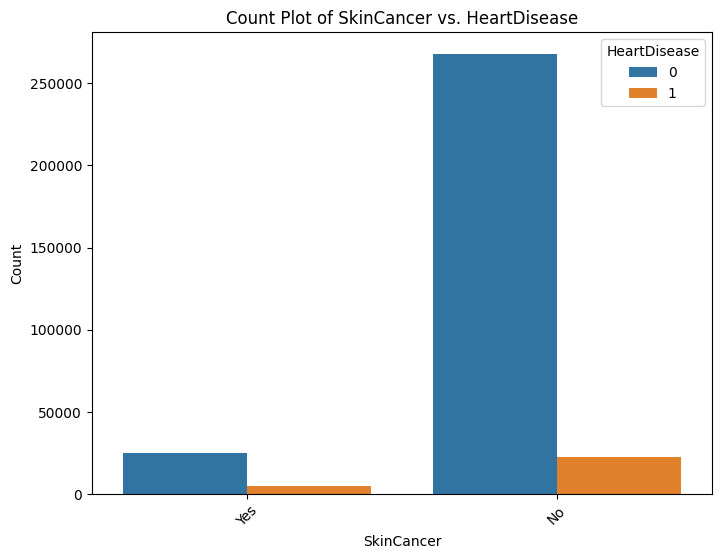

In [24]:
categorical_columns = [ 'Smoking', 'AlcoholDrinking','Stroke','DiffWalking','Sex', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma',
       'KidneyDisease', 'SkinCancer']

for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=column, hue='HeartDisease')
    plt.title(f'Count Plot of {column} vs. HeartDisease')
    plt.xticks(rotation=45)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='HeartDisease', labels=[0,1])
    plt.show()


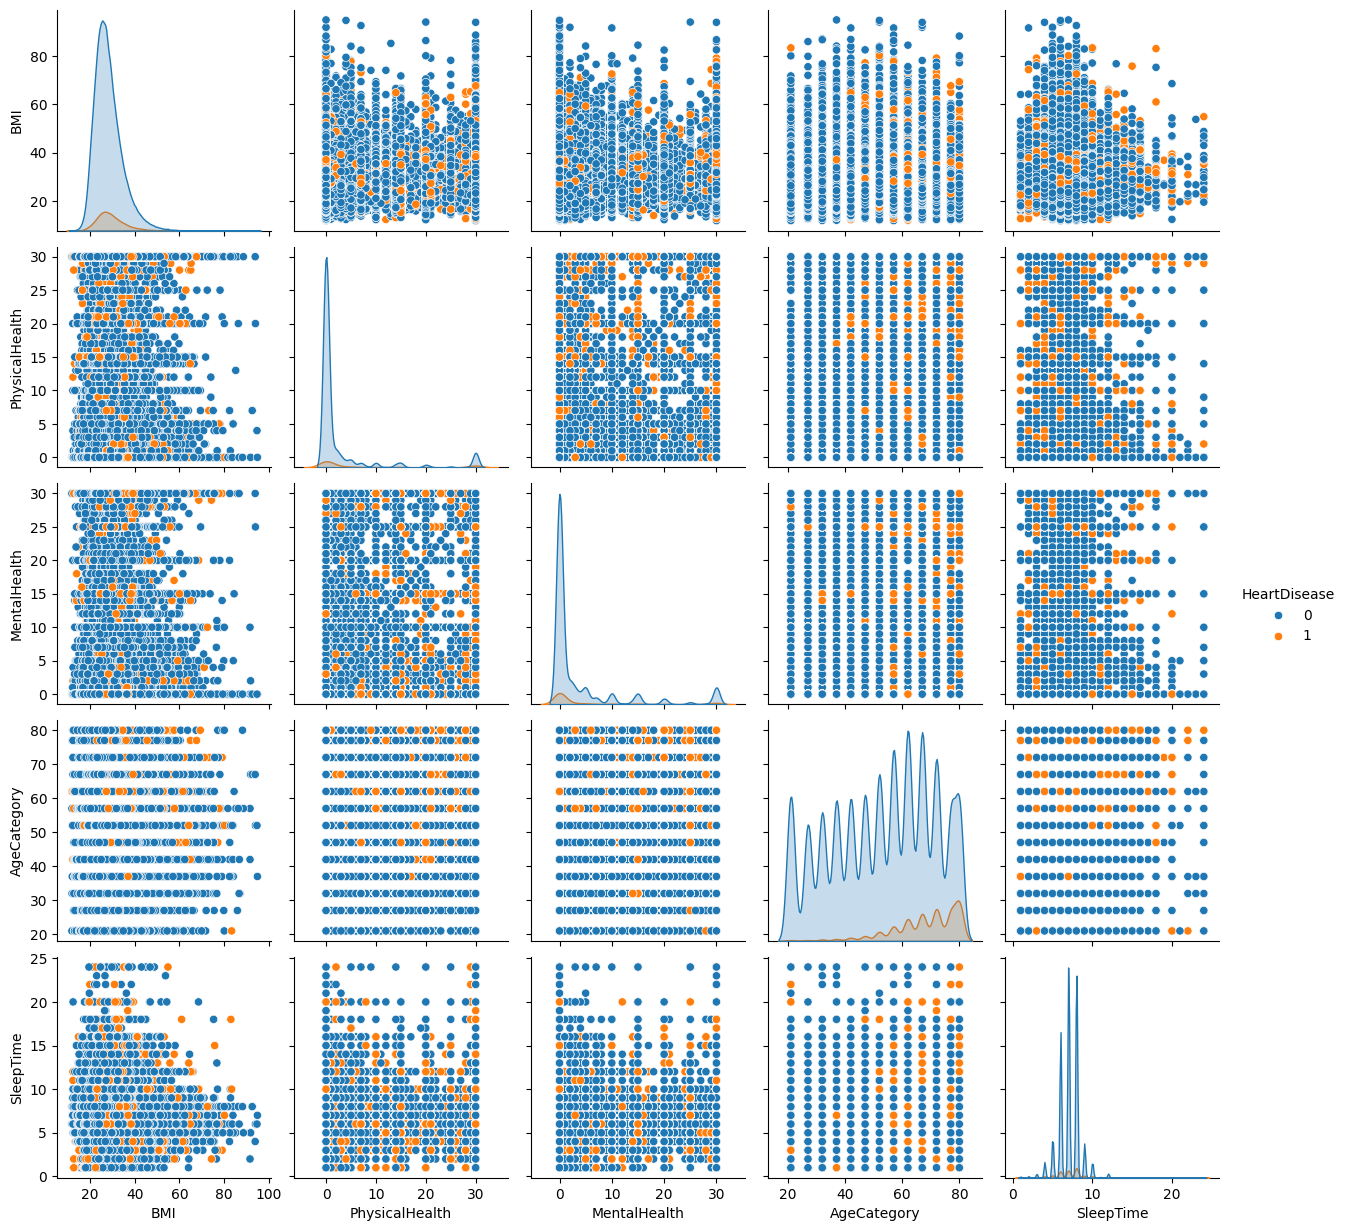

CPU times: total: 2min 24s
Wall time: 4min 53s


In [25]:
%%time
sns.pairplot(data,hue='HeartDisease')
plt.show()

<Axes: >

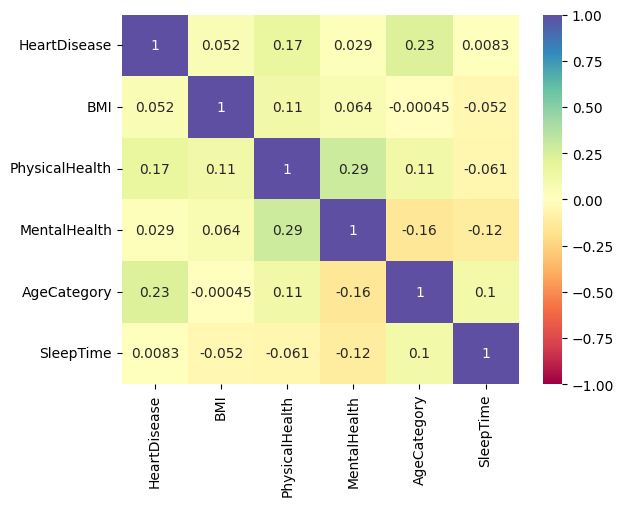

In [26]:
sns.heatmap(data.corr(),annot=True,cmap='Spectral',vmax=+1,vmin=-1)

In [27]:
value_counts=df['HeartDisease'].value_counts()

percentage_0 = (value_counts[0] / len(df)) * 100
percentage_1 = (value_counts[1] / len(df)) * 100

# Print the percentages
print(f'Percentage of 0: {percentage_0:.2f}%')
print(f'Percentage of 1: {percentage_1:.2f}%')

Percentage of 0: 91.44%
Percentage of 1: 8.56%


**Observations**
1. HeartDisease is higly imbalanced with 91.44% of class 0 and 8.56% of class 1.
2. There is no high correaltion between any variable.
3. Physical and mental health are highly right skewed.
4. Sleep time is multiodal in nature.

### Step 5: Data Preprocessing
- Seperate features and label
- Do the label encoding 
- Solve for Data_imbalance
- Train_test_split
- Feature Scaling

In [28]:
for col in cat_col:
    print("Value counts for column:", col)
    print(data[col].value_counts())
    print("\n")

Value counts for column: HeartDisease
0    292422
1     27373
Name: HeartDisease, dtype: int64


Value counts for column: Smoking
No     187887
Yes    131908
Name: Smoking, dtype: int64


Value counts for column: AlcoholDrinking
No     298018
Yes     21777
Name: AlcoholDrinking, dtype: int64


Value counts for column: Stroke
No     307726
Yes     12069
Name: Stroke, dtype: int64


Value counts for column: DiffWalking
No     275385
Yes     44410
Name: DiffWalking, dtype: int64


Value counts for column: Sex
Female    167805
Male      151990
Name: Sex, dtype: int64


Value counts for column: Race
White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64


Value counts for column: Diabetic
No                         269653
Yes                         40802
No, borderline diabetes

In [29]:
data.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [30]:
df2=data.copy()

In [31]:
# Check unique values in the 'Sex' column to identify any inconsistencies
unique_sex_values = df2['Sex'].unique()
print(unique_sex_values)


['Female' 'Male']


In [32]:
d={"No":0,"Yes":1}
df2['Smoking']=df2['Smoking'].map(d)
df2['AlcoholDrinking']=df2['AlcoholDrinking'].map(d)
df2['Stroke']=df2['Stroke'].map(d)
df2['DiffWalking']=df2['DiffWalking'].map(d)
#df2['Sex']=df2['Sex'].map(d)
df2['PhysicalActivity']=df2['PhysicalActivity'].map(d)
df2['Asthma']=df2['Asthma'].map(d)
df2['KidneyDisease']=df2['KidneyDisease'].map(d)
df2['SkinCancer']=df2['SkinCancer'].map(d)

In [33]:
d={'No':0,'No, borderline diabetes':0,'Yes':1,'Yes (during pregnancy)':1}
df2['Diabetic']=df2['Diabetic'].map(d)

In [34]:
d={"Poor":0,"Very good":1,'Good':1,'Excellent':1,'Fair':1}
df2['GenHealth']=df2['GenHealth'].map(d)

In [35]:
d={"Female":0,"Male":1}
df2['Sex']=df2['Sex'].map(d)

In [36]:
df2['Sex'].isnull().sum()

0

In [37]:
#Dropping unnecessary column
df2=df2.drop(columns='Race')
df2.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma',
       'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  float64
 10  Diabetic          319795 non-null  int64  
 11  PhysicalActivity  319795 non-null  int64  
 12  GenHealth         319795 non-null  int64  
 13  SleepTime         319795 non-null  float64
 14  Asthma            319795 non-null  int64  
 15  KidneyDisease     319795 non-null  int64  
 16  SkinCancer        31

In [39]:
df2.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [40]:
sampled_df = df2.sample(n=100000, random_state=42)

In [41]:
def process(data,label):
    # Seperate the features and label
    X=sampled_df.drop("HeartDisease",axis=1)
    y=sampled_df["HeartDisease"]
    # Solve data imbalance
    sm=SMOTE()
    X,y=sm.fit_resample(X,y)
    # train test split
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y) # Stratify will maintain the ratio of 0 and 1 in train and test
    return x_train,x_test,y_train,y_test


In [42]:
x_train,x_test,y_train,y_test=process(sampled_df,label="HeartDisease")

In [43]:
# Scale the features
sc=StandardScaler()
x_train=sc.fit_transform(x_train) # fit is to get mean and std from the data
                                  # transform to use that mean and std on the data
                                  # only transform is used in x_test so that it used x_train mean and std to transform and not test
x_test=sc.transform(x_test)        

We have preprocessed the data

## Step 6: Fit and Evaluate ML Algorithms

In [44]:
# create a metrics function
def print_metrics(y_test,y_pred,model_name):
    print("Metrics for model...",model_name)
    print(" ")
    print("Accuracy Score=",accuracy_score(y_test,y_pred))
    print(" ")
    print("Recall Score=",recall_score(y_test,y_pred))
    print(" ")
    print("Precision Score=",precision_score(y_test,y_pred))
    print(" ")
    print("f1 Score=",f1_score(y_test,y_pred))
    print(" ")
    print("ROC AUC Score=",roc_auc_score(y_test,y_pred))
    print(" ")
    print("Confusion Matrix")
    print(confusion_matrix(y_test,y_pred))
    print(" ")
    print("Classification Report")
    print(classification_report(y_test,y_pred))

In [45]:
%%time
# Lets print and evaluate a KNN model
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print_metrics(y_test,y_pred,"KNN")

Metrics for model... KNN
 
Accuracy Score= 0.8217393683980078
 
Recall Score= 0.8749931585572766
 
Precision Score= 0.7907701439382697
 
f1 Score= 0.830752442319684
 
ROC AUC Score= 0.8217393683980078
 
Confusion Matrix
[[14041  4230]
 [ 2284 15987]]
 
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.77      0.81     18271
           1       0.79      0.87      0.83     18271

    accuracy                           0.82     36542
   macro avg       0.83      0.82      0.82     36542
weighted avg       0.83      0.82      0.82     36542

CPU times: total: 15.8 s
Wall time: 5.17 s


In [46]:
plt.style.use('fivethirtyeight') # fivethirtyeight is the website used during presidential elections in USA

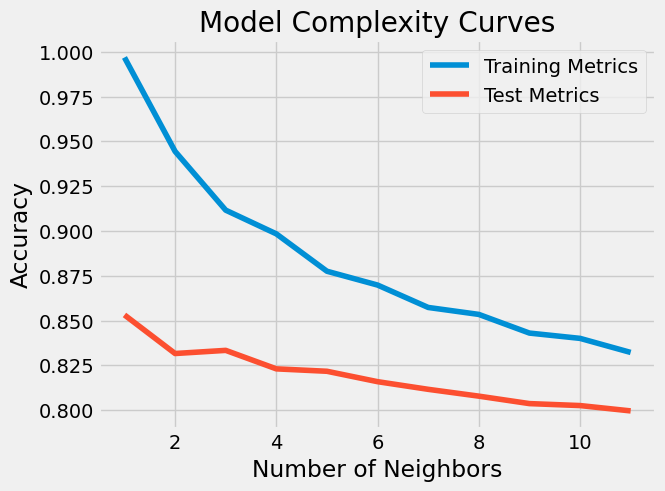

CPU times: total: 13min 24s
Wall time: 4min 19s


In [47]:
%%time
# Lets optimize the neighbours to improve by drawing model complexity curves
neighbors=np.arange(1,12)
train_accuracies=np.empty(len(neighbors))
test_accuracies=np.empty(len(neighbors))

#enumerate over the neighbors
for i,k in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracies[i]=knn.score(x_train,y_train)
    test_accuracies[i]=knn.score(x_test,y_test)

# Plot the model complexity curves
plt.plot(neighbors,train_accuracies,label="Training Metrics")
plt.plot(neighbors,test_accuracies,label="Test Metrics")
plt.legend()
plt.title("Model Complexity Curves")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [48]:
%%time
# Refit KNN with k=10
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print_metrics(y_test,y_pred,"KNN")

Metrics for model... KNN
 
Accuracy Score= 0.8026106945432653
 
Recall Score= 0.8279787641617864
 
Precision Score= 0.7879987498697781
 
f1 Score= 0.8074941952013666
 
ROC AUC Score= 0.8026106945432653
 
Confusion Matrix
[[14201  4070]
 [ 3143 15128]]
 
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.78      0.80     18271
           1       0.79      0.83      0.81     18271

    accuracy                           0.80     36542
   macro avg       0.80      0.80      0.80     36542
weighted avg       0.80      0.80      0.80     36542

CPU times: total: 15.6 s
Wall time: 5.29 s


In [49]:
%%time
# Fit all models to get the best model to optimize
clfs={"logreg":LogisticRegression(),
    "knn":KNeighborsClassifier(),
     "naive bayes":GaussianNB(),
     "decision tree":DecisionTreeClassifier(),
     "rfc":RandomForestClassifier(),
     "ABC":AdaBoostClassifier(),
     "GBC":GradientBoostingClassifier(),
     "SVM":SVC(),
     "XGB":XGBClassifier()}
models_report=pd.DataFrame(columns=["Model Name","Accuracy","Recall","Precision","F1 Score"])
for clf,clf_name in list(zip(clfs.values(),clfs.keys())):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    print("Fitting the model ...",clf_name)
    t=pd.Series({"Model Name":clf_name,
                 "Accuracy":accuracy_score(y_test,y_pred),
                 "Recall":recall_score(y_test,y_pred),
                 "Precision":precision_score(y_test,y_pred),
                 "F1 Score":f1_score(y_test,y_pred)})
    models_report=models_report.append(t,ignore_index=True)
models_report=models_report.sort_values(by="F1 Score",ascending=False)
print(models_report)

Fitting the model ... logreg
Fitting the model ... knn
Fitting the model ... naive bayes
Fitting the model ... decision tree
Fitting the model ... rfc
Fitting the model ... ABC
Fitting the model ... GBC
Fitting the model ... SVM
Fitting the model ... XGB
      Model Name  Accuracy    Recall  Precision  F1 Score
4            rfc  0.900909  0.904548   0.898011  0.901268
8            XGB  0.876963  0.864321   0.886743  0.875388
3  decision tree  0.872995  0.877675   0.869537  0.873587
1            knn  0.821739  0.874993   0.790770  0.830752
6            GBC  0.818182  0.838049   0.806022  0.821724
5            ABC  0.781566  0.790323   0.776720  0.783463
7            SVM  0.760686  0.812107   0.736377  0.772390
0         logreg  0.744759  0.782661   0.727513  0.754080
2    naive bayes  0.681681  0.591867   0.721462  0.650271
CPU times: total: 9min 59s
Wall time: 26min 20s


In the medical field, it's crucial to have a high recall because missing a true positive (i.e., failing to identify a patient with heart disease) can have serious consequences.

# Step 7: Prepare for deployment by creating a pipeline

In [50]:
from sklearn.pipeline import Pipeline

In [51]:
sc=StandardScaler()
model=RandomForestClassifier(criterion='entropy', max_depth=70, max_features='log2',
                       min_samples_split=4, n_estimators=950)
steps=[("scaler",sc),("model",model)]
pipeline=Pipeline(steps) 
x_train,x_test,y_train,y_test=process(sampled_df,label="Outcome")
pipeline.fit(x_train,y_train)
y_pred=pipeline.predict(x_test)
print_metrics(y_test,y_pred,"Pipeline")

Metrics for model... Pipeline
 
Accuracy Score= 0.9043839964971814
 
Recall Score= 0.909692956050572
 
Precision Score= 0.9001353912808016
 
f1 Score= 0.9048889372822301
 
ROC AUC Score= 0.9043839964971814
 
Confusion Matrix
[[16427  1844]
 [ 1650 16621]]
 
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.90      0.90     18271
           1       0.90      0.91      0.90     18271

    accuracy                           0.90     36542
   macro avg       0.90      0.90      0.90     36542
weighted avg       0.90      0.90      0.90     36542



In [52]:
# Lets freeze the model
import pickle
clf=open("rfc.pickle","wb")
pickle.dump(pipeline,clf)
clf.close()

In [53]:
sampled_df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
271884,0,27.63,1,0,0,0.0,25.0,0,0,27.0,0,1,1,7.0,0,0,0
270361,0,21.95,0,0,0,0.0,20.0,0,0,32.0,0,1,1,6.0,0,0,1
219060,0,31.32,1,0,0,0.0,0.0,0,0,42.0,0,1,1,6.0,1,0,0
24010,0,40.35,0,0,0,30.0,0.0,0,0,67.0,0,0,1,8.0,0,0,0
181930,0,35.61,1,0,0,30.0,30.0,1,0,62.0,0,0,1,4.0,1,0,1
24149,1,24.63,1,0,0,0.0,0.0,0,0,80.0,1,1,1,8.0,0,0,0
185683,0,41.73,0,0,0,0.0,0.0,0,1,37.0,0,1,1,7.0,0,0,0
316656,0,16.30,0,0,0,2.0,0.0,0,0,27.0,0,0,1,8.0,0,0,0
305719,0,21.52,1,0,0,30.0,0.0,0,1,67.0,0,0,1,8.0,0,0,0
56786,0,29.53,1,0,0,28.0,30.0,1,1,47.0,0,1,1,5.0,1,0,0


In [54]:
%%time
# Check the model for a new data
import pickle
import pandas as pd

# Load the model
clf = open("rfc.pickle", "rb")
rfc = pickle.load(clf)
clf.close()

# New data for prediction
new_data = pd.DataFrame({
    'BMI': [35],'Smoking': [1],'AlcoholDrinking': [1],'Stroke': [1],'PhysicalHealth': [30.0],'MentalHealth': [23.0],
    'DiffWalking': [1],'Sex': [1],'AgeCategory': [70.0],'Diabetic': [1],'PhysicalActivity': [0],'GenHealth': [1],
    'SleepTime': [5.0],'Asthma': [1],'KidneyDisease': [1],
    'SkinCancer': [0]
})

# Predict using the loaded model
pred = rfc.predict(new_data)[0]

# Interpret the prediction
if pred == 1:
    print("Heart Disease")
else:
    print("Healthy")


Healthy
CPU times: total: 1.88 s
Wall time: 11.4 s


In [55]:
%%time
# Assuming the RandomForestClassifier is the second step in your pipeline
rfc_model = pipeline.named_steps['model']

# Check if the model has the feature_importances_ attribute
if hasattr(rfc_model, 'feature_importances_'):
    feature_importances = rfc_model.feature_importances_

    # Display feature importances
    for feature, importance in zip(sampled_df.drop('HeartDisease', axis=1).columns, feature_importances):
        print(f"{feature}: {importance}")
else:
    print("The model does not have the 'feature_importances_' attribute.")


BMI: 0.2923825602223689
Smoking: 0.018044360235613732
AlcoholDrinking: 0.015283027549296325
Stroke: 0.008486735711806713
PhysicalHealth: 0.0813744456283091
MentalHealth: 0.06404361822559718
DiffWalking: 0.012634298932789303
Sex: 0.018894858028728846
AgeCategory: 0.19764035851424328
Diabetic: 0.013825035161540149
PhysicalActivity: 0.034267206955789664
GenHealth: 0.036458971998914944
SleepTime: 0.17620291280098177
Asthma: 0.012759298524991317
KidneyDisease: 0.006751126299761449
SkinCancer: 0.0109511852092674
CPU times: total: 1.64 s
Wall time: 6.73 s


# Step 8: Deployment in Streamlit

In [56]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pickle

st.set_option('deprecation.showPyplotGlobalUse', False)
st.title("Web Deployment of Medical Heart Disease App ")
st.subheader("Does the person have Heart Disease?")
df = pd.read_csv("heart_2020_cleaned.csv")  # Change "your_data.csv" to the actual CSV file containing your data

if st.sidebar.checkbox("View Data", False):
    st.write(df)

if st.sidebar.checkbox("View Distributions", False):
    df.hist()
    plt.tight_layout()
    st.pyplot()

# Step 1: Load the pickled model
model = open("rfc.pickle", "rb")
clf = pickle.load(model)
model.close()

# Step 2: Get the front-end user input
BMI = st.slider('BMI', 18.0, 67.0, 18.0)
Smoking = st.selectbox('Smoking', ['No', 'Yes'])
AlcoholDrinking = st.selectbox('Alcohol Drinking', ['No', 'Yes'])
Stroke = st.selectbox('Stroke', ['No', 'Yes'])
PhysicalHealth = st.slider('Physical Health', 0.0, 30.0, 0.0)
MentalHealth = st.slider('Mental Health', 0.0, 30.0, 0.0)
DiffWalking = st.selectbox('Difficulty Walking', ['No', 'Yes'])
Sex = st.selectbox('Sex', ['Female', 'Male'])
AgeCategory = st.slider('Age Category', 21.0, 85.0, 21.0)
Diabetic = st.selectbox('Diabetic', ['No', 'Yes'])
PhysicalActivity = st.selectbox('Physical Activity', ['No', 'Yes'])
GenHealth = st.selectbox('General Health', ['Poor', 'Fair', 'Good', 'Very good', 'Excellent'])
SleepTime = st.slider('Sleep Time', 4.0, 10.0, 4.0)
Asthma = st.selectbox('Asthma', ['No', 'Yes'])
KidneyDisease = st.selectbox('Kidney Disease', ['No', 'Yes'])
SkinCancer = st.selectbox('Skin Cancer', ['No', 'Yes'])

# Step 3: Convert user input to model input
data = {'BMI': BMI, 'Smoking': Smoking, 'AlcoholDrinking': AlcoholDrinking, 'Stroke': Stroke,
        'PhysicalHealth': PhysicalHealth, 'MentalHealth': MentalHealth, 'DiffWalking': DiffWalking,
        'Sex': Sex, 'AgeCategory': AgeCategory, 'Diabetic': Diabetic, 'PhysicalActivity': PhysicalActivity,
        'GenHealth': GenHealth, 'SleepTime': SleepTime, 'Asthma': Asthma, 'KidneyDisease': KidneyDisease,
        'SkinCancer': SkinCancer}

input_data = pd.DataFrame([data])

# Step 4: Get the predictions and print the result
prediction = clf.predict(input_data)[0]
if st.button("Predict"):
    if prediction == 1:
        st.subheader('Has Heart Disease')
    else:
        st.subheader('Healthy')


Writing app.py


In [57]:
pd.__version__

'1.5.3'

In [58]:
st.__version__

'1.27.1'

In [59]:
import sklearn
sklearn.__version__

'1.3.1'

In [60]:
import matplotlib
matplotlib .__version__

'3.8.0'

In [61]:
!pip install streamlit

In [62]:
streamlit run app.py

SyntaxError: invalid syntax (3737097518.py, line 1)